In [80]:
df2 = pd.read_csv('Omnify_Analyst.csv')
df2.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost,Leads,Prospects,Payment,Payment Date,Country
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,3-Feb-21,USA
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaN,USA
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",13-Mar-21,USA
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaN,USA
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaN,USA


In [83]:
#preprocessing the data
df2['Payment']=df2['Payment'].str.replace('$','')
df2['Payment']=df2['Payment'].str.replace(',','')
df2['Payment'] = pd.to_numeric(df2['Payment'])
df2['Payment'].fillna(0, inplace=True)

In [84]:
df2

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost,Leads,Prospects,Payment,Payment Date,Country
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,3-Feb-21,USA
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,NaN,USA
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,13-Mar-21,USA
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,0.0,NaN,USA
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,0.0,NaN,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3-May-21,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0.00,0,0,0.0,NaN,USA
414,3-May-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0.00,0,0,0.0,NaN,USA
415,3-May-21,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0.00,0,0,0.0,NaN,USA
416,3-May-21,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0.00,0,0,0.0,NaN,USA


In [85]:
#calculating returns
df2['Returns %']=((df2['Payment'] - df2['Cost']) / df2['Cost']) * 100

In [86]:
df2.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost,Leads,Prospects,Payment,Payment Date,Country,Returns %
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,3-Feb-21,USA,2456.744065
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,NaN,USA,-100.000000
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,13-Mar-21,USA,2532.395302
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,0.0,NaN,USA,-100.000000
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,0.0,NaN,USA,-100.000000


In [88]:
#Extracting the week and month From the week column 
df2['Week'] = pd.to_datetime(df2['Week'])
df2['Week_C'] = df2['Week'].dt.week
df2['Month'] = df2['Week'].dt.month

C:\Users\SIVAPA~1\AppData\Local\Temp/ipykernel_564/334448038.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['Week_C'] = df2['Week'].dt.week


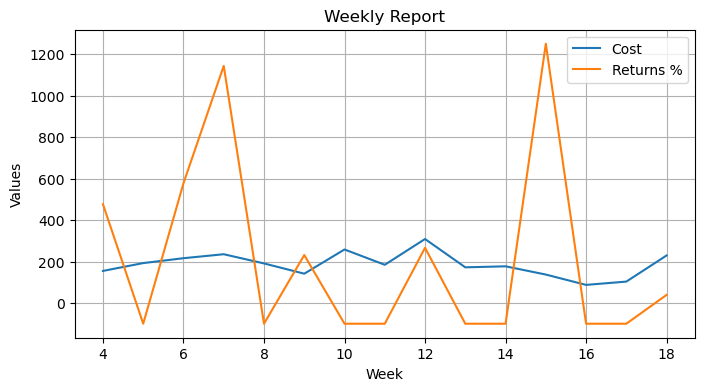

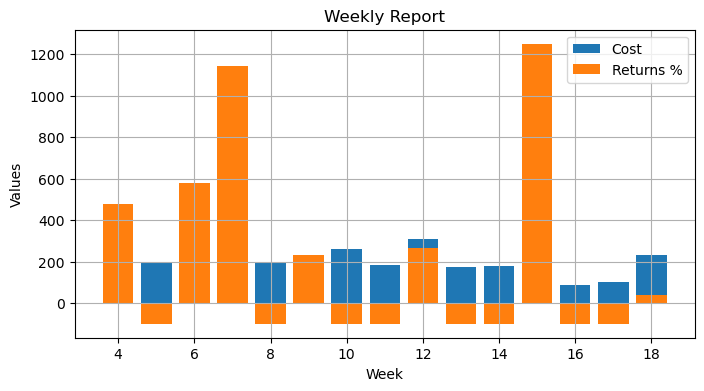

In [92]:
#aggregating and generating weekly reports
weekly_report = df2.groupby('Week_C').agg({
    'Cost': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Prospects': 'sum',
    'Payment': 'sum',
    'Returns %': 'mean'
}).reset_index()
#Weekly report as line plot
plt.figure(figsize=(8, 4))
plt.plot(weekly_report['Week_C'], weekly_report['Cost'], label='Cost')
plt.plot(weekly_report['Week_C'], weekly_report['Returns %'], label='Returns %')
plt.xlabel('Week')
plt.ylabel('Values')
plt.title('Weekly Report')
plt.legend()
plt.grid()
plt.show()
#Weekly report as bar plot
plt.figure(figsize=(8, 4))
plt.bar(weekly_report['Week_C'], weekly_report['Cost'], label='Cost')
plt.bar(weekly_report['Week_C'], weekly_report['Returns %'], label='Returns %')
plt.xlabel('Week')
plt.ylabel('Values')
plt.title('Weekly Report')
plt.legend()
plt.grid()
plt.show()

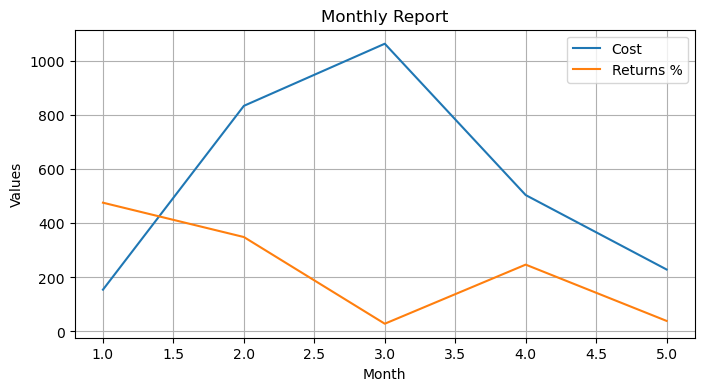

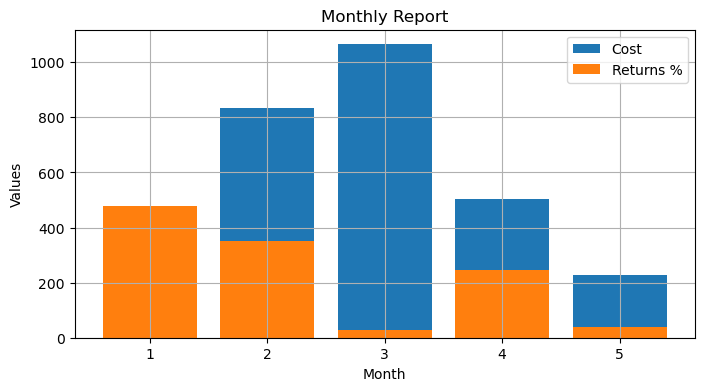

In [93]:
#aggregating and generating monthly reports
Monthly_report = df2.groupby('Month').agg({
    'Cost': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Prospects': 'sum',
    'Payment': 'sum',
    'Returns %': 'mean'
}).reset_index()
#Monthly report as line plot
plt.figure(figsize=(8, 4))
plt.plot(Monthly_report['Month'], Monthly_report['Cost'], label='Cost')
plt.plot(Monthly_report['Month'], Monthly_report['Returns %'], label='Returns %')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Report')
plt.legend()
plt.grid()
plt.show()
#Monthly report as bar plot
plt.figure(figsize=(8, 4))
plt.bar(Monthly_report['Month'], Monthly_report['Cost'], label='Cost')
plt.bar(Monthly_report['Month'], Monthly_report['Returns %'], label='Returns %')
plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Report')
plt.legend()
plt.grid()
plt.show()